In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

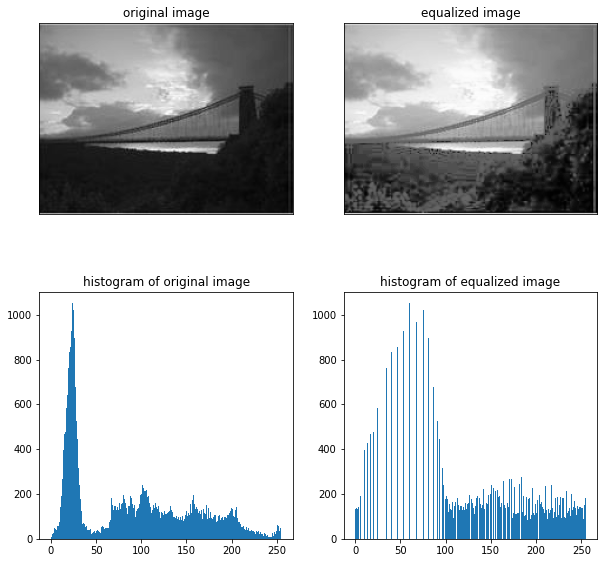

In [21]:
img = np.array(cv2.imread("nature.jpg", cv2.IMREAD_GRAYSCALE))

# Calc image histogram with 256 bins
Nhist = cv2.calcHist([img], [0], None, [256], [0, 256]) / np.size(img)
CDFhist = np.cumsum(Nhist)

m,n = img.shape

img2 = np.zeros_like(img)

for i in range(m):
  for j in range(n):
    img2[i,j] = CDFhist[img[i,j]]*255

fig, axes= plt.subplots(2, 2, figsize=(10, 10))
axes[0,0].imshow(img, cmap='gray')
axes[0,0].set_title('original image')

axes[0,1].imshow(img2, cmap='gray')
axes[0,1].set_title('equalized image')

axes[1,0].hist(img.ravel(), bins = np.arange(0,256))
axes[1,0].set_title('histogram of original image')

axes[1,1].hist(img2.ravel(), bins = np.arange(0,256))
axes[1,1].set_title('histogram of equalized image')

# remove the x and y ticks
for ax in axes[0]:
    ax.set_xticks([])
    ax.set_yticks([])

cv2.waitKey(0)
cv2.destroyAllWindows()
